In [ ]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns
import os

In [ ]:
#Loading train and test dataset
x_train = np.load('/X_kannada_MNIST_train.npz')['arr_0']
x_test = np.load('/X_kannada_MNIST_test.npz')['arr_0']
y_train = np.load('/y_kannada_MNIST_train.npz')['arr_0']
y_test = np.load('/y_kannada_MNIST_test.npz')['arr_0']


In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [ ]:
'''We have 60K train cases, 10K test cases.
Each example is a 28 x 28 matrix representing the greyscale values.'''

'We have 60K train cases, 10K test cases.\nEach example is a 28 x 28 matrix representing the greyscale values.'

In [ ]:
#visualizing number from 0 to 9 in kannada

In [ ]:
def plot_random_digit():
    random_index = np.random.randint(0,x_train.shape[0])
    plt.imshow(x_train[random_index], cmap='bone')
    plt.title(y_train[random_index])
    plt.axis("Off")

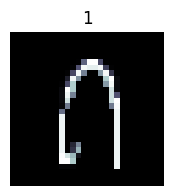

In [ ]:
plt.figure(figsize=[2,2])
plot_random_digit()

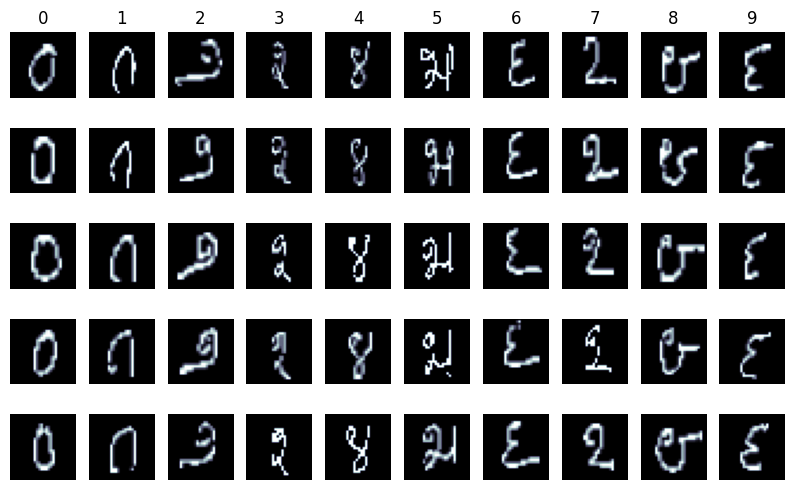

In [ ]:
plt.figure(figsize=[10,6])
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis('Off')
    if i < 10:
        plt.title(y_train[i])
    plt.imshow(x_train[i], cmap='bone')

In [ ]:
#Reshaping the datasets forusimg principle component Analysis
# Flatten the images to 1D arrays
from sklearn.decomposition import PCA
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

n_components = 10
pca = PCA(n_components=n_components)

# Fit and transform the PCA on the training data
x_train_pca = pca.fit_transform(x_train_flat)

# Transform the test data using the same PCA
x_test_pca = pca.transform(x_test_flat)

# Check the shapes of the transformed data
x_test_pca.shape, x_train_pca.shape

((10000, 10), (60000, 10))

In [53]:
# importing Librarys
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrices(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [ ]:
def plot_roc_auc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()


SVC
*******Train************
Accuracy:  0.9653333333333334
Precision:  0.9654974850867946
Recall:  0.9653333333333334
F1 Score:  0.965325149019294
*******Test************
Accuracy:  0.8872
Precision:  0.8907309827793861
Recall:  0.8872
F1 Score:  0.8866826079564731

 



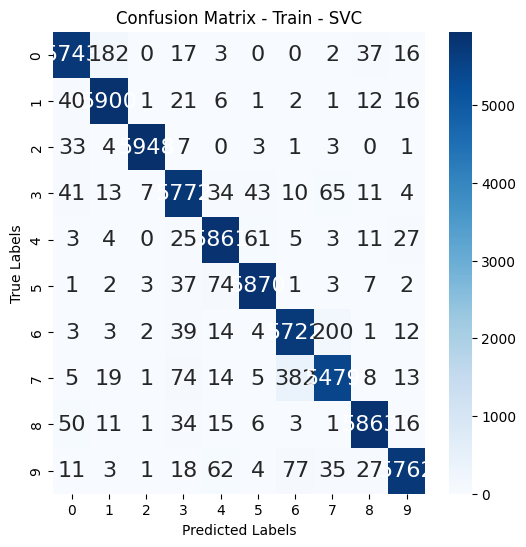

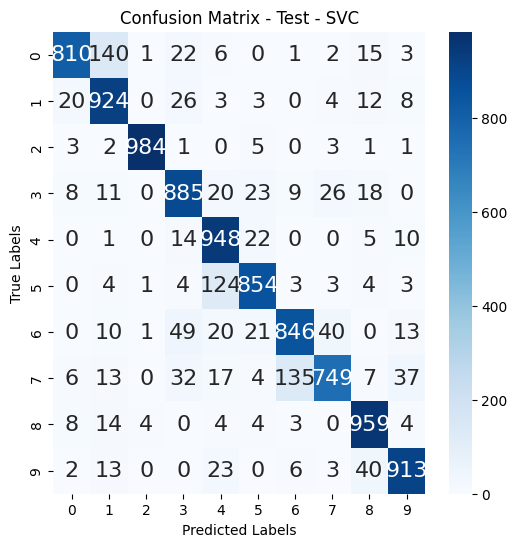

KNeighborsClassifier
*******Train************
Accuracy:  0.9740166666666666
Precision:  0.9741460977548754
Recall:  0.9740166666666666
F1 Score:  0.9740083777702567
*******Test************
Accuracy:  0.8792
Precision:  0.8824443491641898
Recall:  0.8792
F1 Score:  0.8781246801433077

 



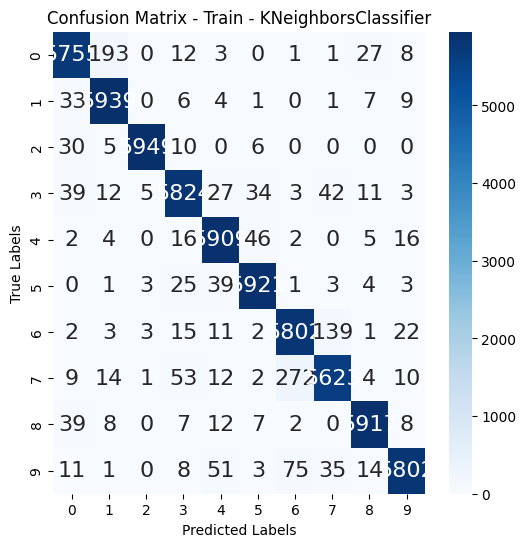

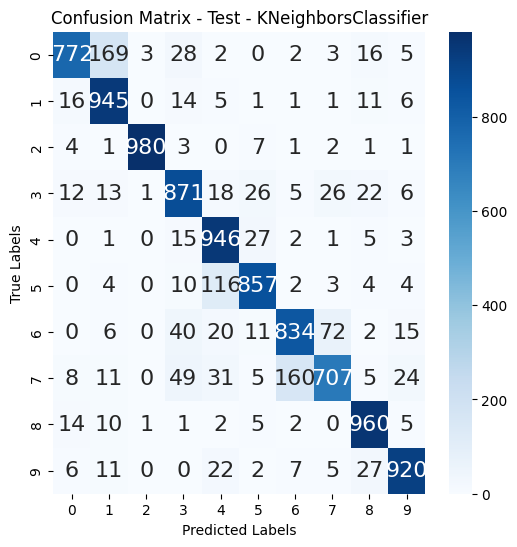

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
*******Train************
Accuracy:  0.9058166666666667
Precision:  0.9057612992029052
Recall:  0.9058166666666667
F1 Score:  0.90568751852447
*******Test************
Accuracy:  0.8068
Precision:  0.8073395987664856
Recall:  0.8068
F1 Score:  0.805346718278235

 



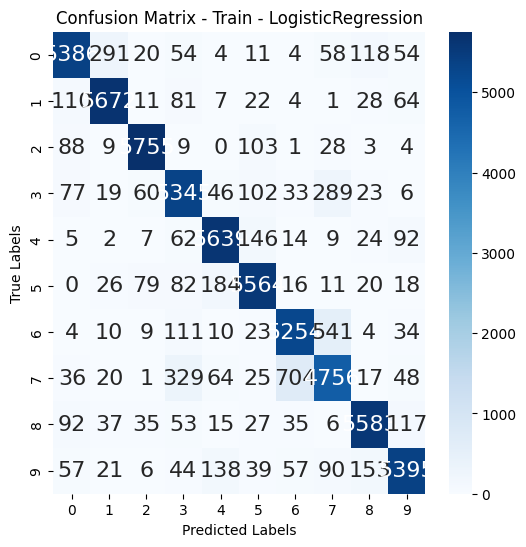

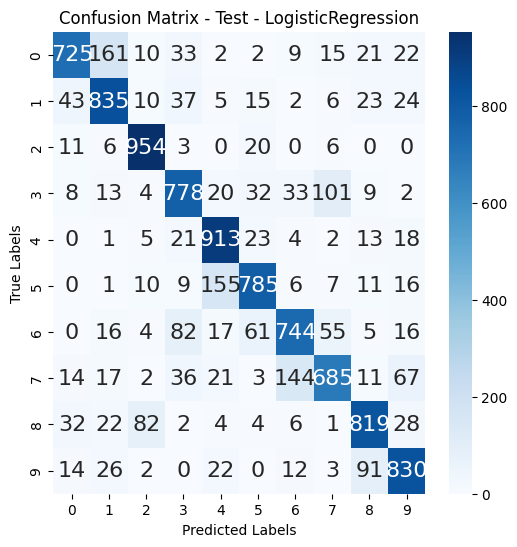

DecisionTreeClassifier
*******Train************
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
*******Test************
Accuracy:  0.804
Precision:  0.8047556054429456
Recall:  0.804
F1 Score:  0.8034572508382888

 



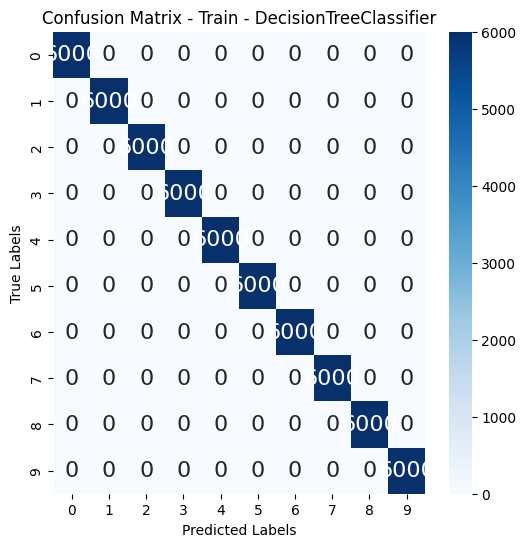

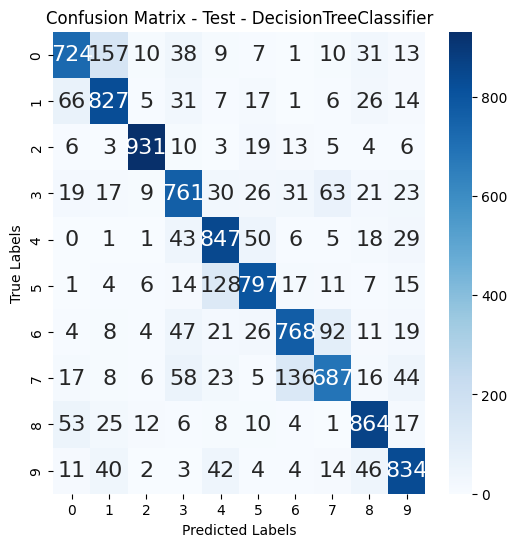

RandomForestClassifier
*******Train************
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
*******Test************
Accuracy:  0.8754
Precision:  0.8778821075249517
Recall:  0.8754
F1 Score:  0.8747518117030051

 



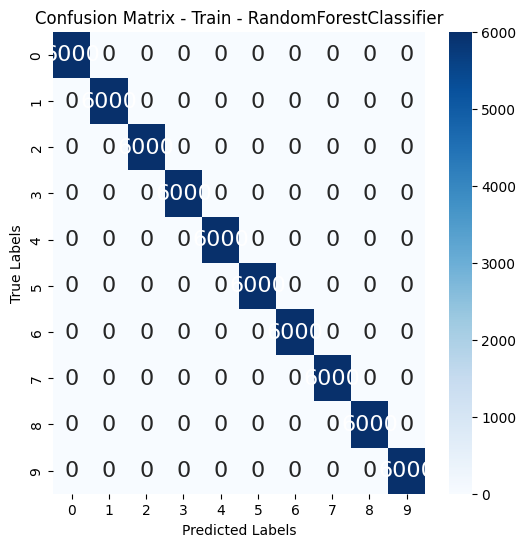

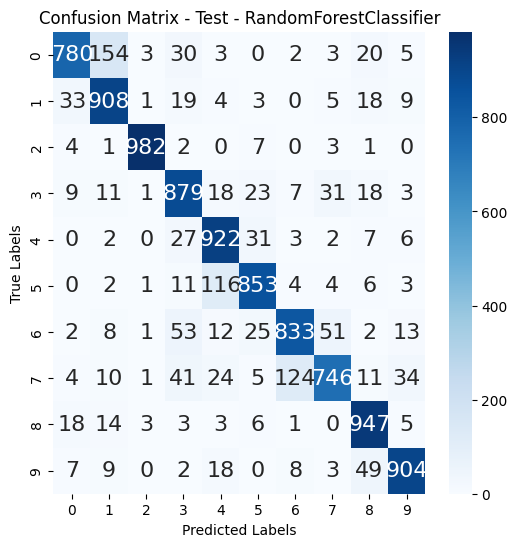

GaussianNB
*******Train************
Accuracy:  0.8677833333333334
Precision:  0.8686451634489283
Recall:  0.8677833333333334
F1 Score:  0.8677923487572832
*******Test************
Accuracy:  0.7725
Precision:  0.7794659834746056
Recall:  0.7725
F1 Score:  0.7710828842695301

 



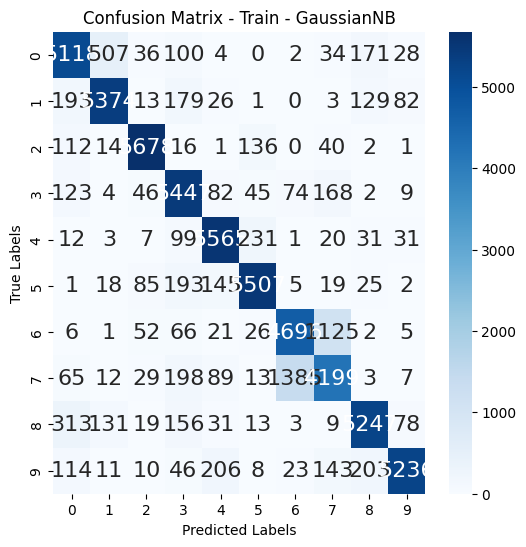

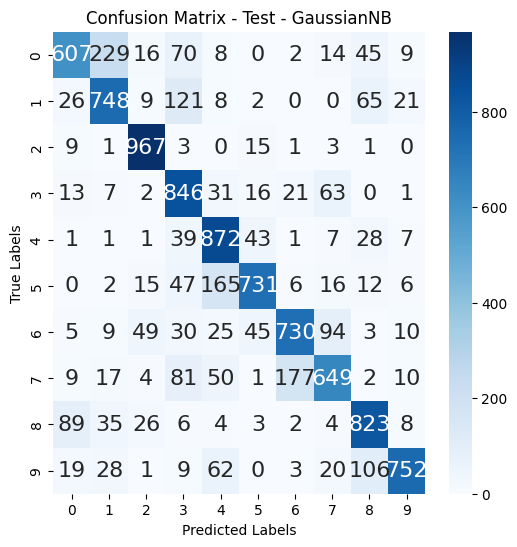

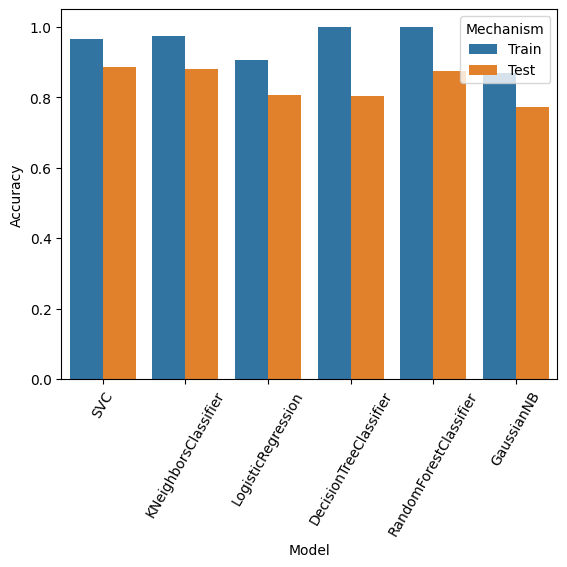

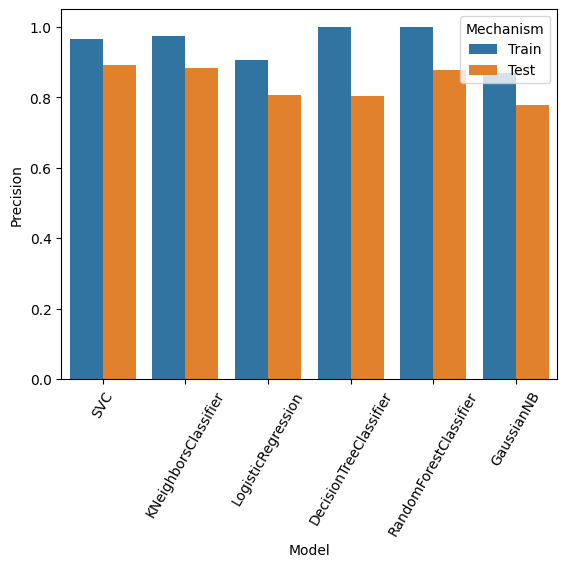

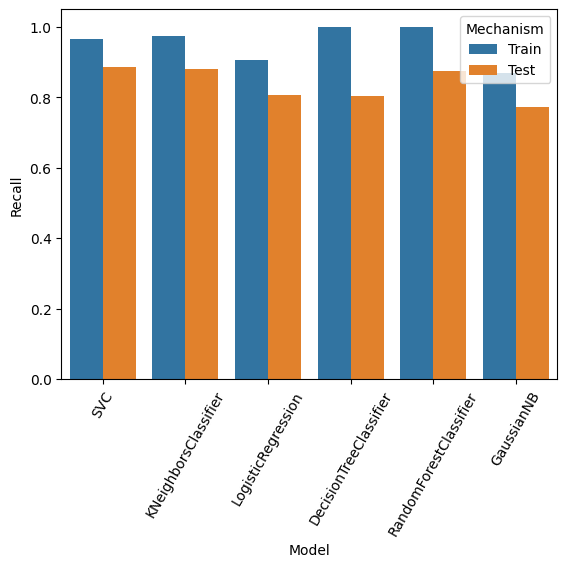

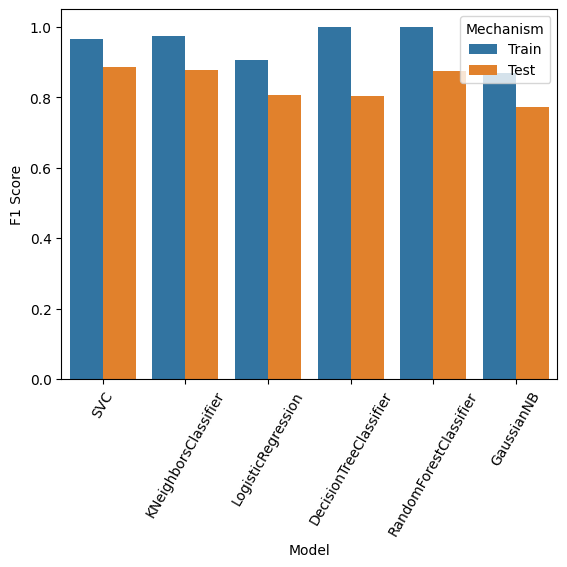

In [54]:
models = [SVC(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
model_names = []
for model in models:
    model.fit(x_train_pca,y_train)
    train_pred = model.predict(x_train_pca)
    test_pred = model.predict(x_test_pca)
    print(type(model).__name__)
    model_names.append(type(model).__name__)
    print("*******Train************")
    print("Accuracy: ",accuracy_score(y_train,train_pred))
    print("Precision: ",precision_score(y_train,train_pred, average='weighted'))
    print("Recall: ",recall_score(y_train,train_pred,average='weighted'))
    print("F1 Score: ",f1_score(y_train,train_pred,average='weighted'))
    train_accuracies.append(accuracy_score(y_train,train_pred))
    train_precisions.append(precision_score(y_train,train_pred,average='weighted'))
    train_recalls.append(recall_score(y_train,train_pred,average='weighted'))
    train_f1s.append(f1_score(y_train,train_pred,average='weighted'))

    print("*******Test************")
    print("Accuracy: ",accuracy_score(y_test,test_pred))
    print("Precision: ",precision_score(y_test,test_pred, average='weighted'))
    print("Recall: ",recall_score(y_test,test_pred,average='weighted'))
    print("F1 Score: ",f1_score(y_test,test_pred,average='weighted'))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    test_precisions.append(precision_score(y_test,test_pred,average='weighted'))
    test_recalls.append(recall_score(y_test,test_pred,average='weighted'))
    test_f1s.append(f1_score(y_test,test_pred,average='weighted'))
    print("\n \n")
    # Calculate and display the confusion matrix for training data
    plot_confusion_matrices(y_train, train_pred, f"Confusion Matrix - Train - {type(model).__name__}")

    # Calculate and display the confusion matrix for testing data
    plot_confusion_matrices(y_test, test_pred, f"Confusion Matrix - Test - {type(model).__name__}")

train_df = pd.DataFrame()
train_df['Accuracy'] =  train_accuracies
train_df['Precision'] =  train_precisions
train_df['Recall'] =  train_recalls
train_df['F1 Score'] =  train_f1s
train_df['Mechanism'] = "Train"
train_df['Model'] = model_names

test_df = pd.DataFrame()
test_df['Accuracy'] =  test_accuracies
test_df['Precision'] =  test_precisions
test_df['Recall'] =  test_recalls
test_df['F1 Score'] =  test_f1s
test_df['Mechanism'] = "Test"
test_df['Model'] = model_names

result_df = pd.concat([train_df, test_df])
for metric in ['Accuracy','Precision','Recall','F1 Score']:
    sns.barplot(data =result_df,x ='Model',y = metric,hue="Mechanism")
    plt.xticks(rotation=60)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


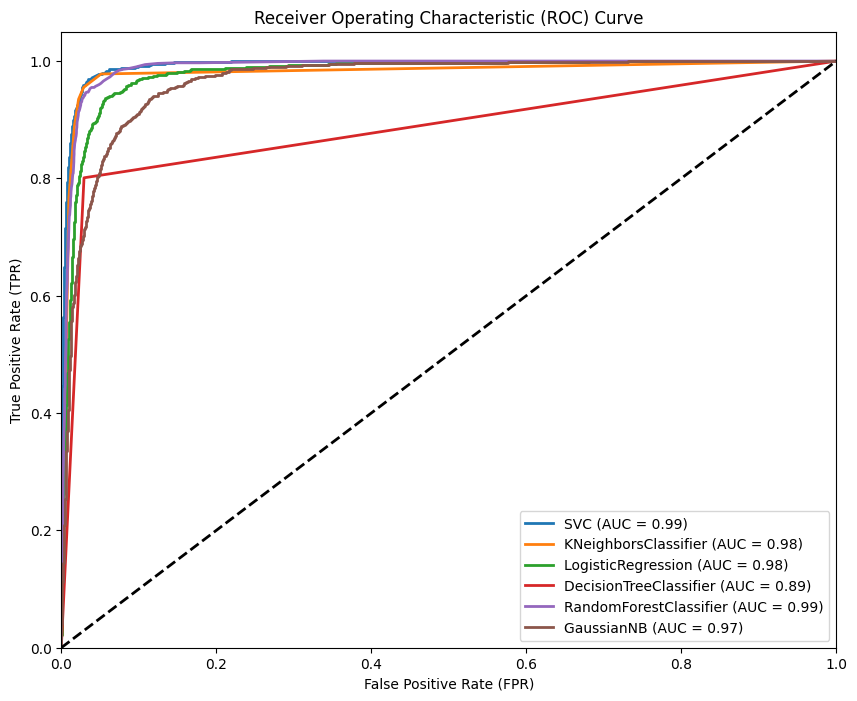

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Lists to store ROC curve data
fpr_list = []
tpr_list = []
roc_auc_list = []
model_names = []

models = [SVC(probability=True), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()]

for model in models:
    model_name = type(model).__name__
    model_names.append(model_name)

    model.fit(x_train_pca, y_train)

    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(x_test_pca)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1],pos_label=1)
    elif isinstance(model, KNeighborsClassifier):
        # For K-Nearest Neighbors, calculate probabilities based on distances to neighbors
        distances, indices = model.kneighbors(x_test_pca)
        neighbor_labels = y_train[indices]
        # Assign a probability score based on the majority class of neighbors
        y_pred_prob = np.mean(neighbor_labels, axis=1)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    else:
        raise ValueError("Model not supported for ROC curve calculation.")

    fpr_list.append(fpr)
    tpr_list.append(tpr)

    # Calculate ROC-AUC score
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC-AUC curves for all models
plt.figure(figsize=(10, 8))
for i in range(len(models)):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'{model_names[i]} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()